In [2]:
# !curl 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv' -o spotify_songs.csv

In [3]:
# libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
df=pd.read_csv('spotify_songs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df=df.drop_duplicates(['track_name']).reset_index(drop=True)
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000
mean,39.742900,0.655216,0.696644,5.374328,-6.848303,0.566695,0.110325,0.181122,0.094071,0.191592,0.511361,121.080121,226109.422090
std,23.408111,0.146206,0.184191,3.617237,3.063545,0.495542,0.104771,0.226136,0.236689,0.157299,0.234756,27.088388,61688.227897
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,23.000000,0.563000,0.578000,2.000000,-8.341000,0.000000,0.041200,0.014800,0.000000,0.092700,0.330000,99.972000,187200.000000
50%,43.000000,0.672000,0.720000,6.000000,-6.285000,1.000000,0.063700,0.082700,0.000019,0.127000,0.513000,122.004500,216138.000000
75%,58.000000,0.762000,0.841000,9.000000,-4.727000,1.000000,0.139000,0.266000,0.006960,0.249750,0.695000,134.779250,254503.500000
max,98.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


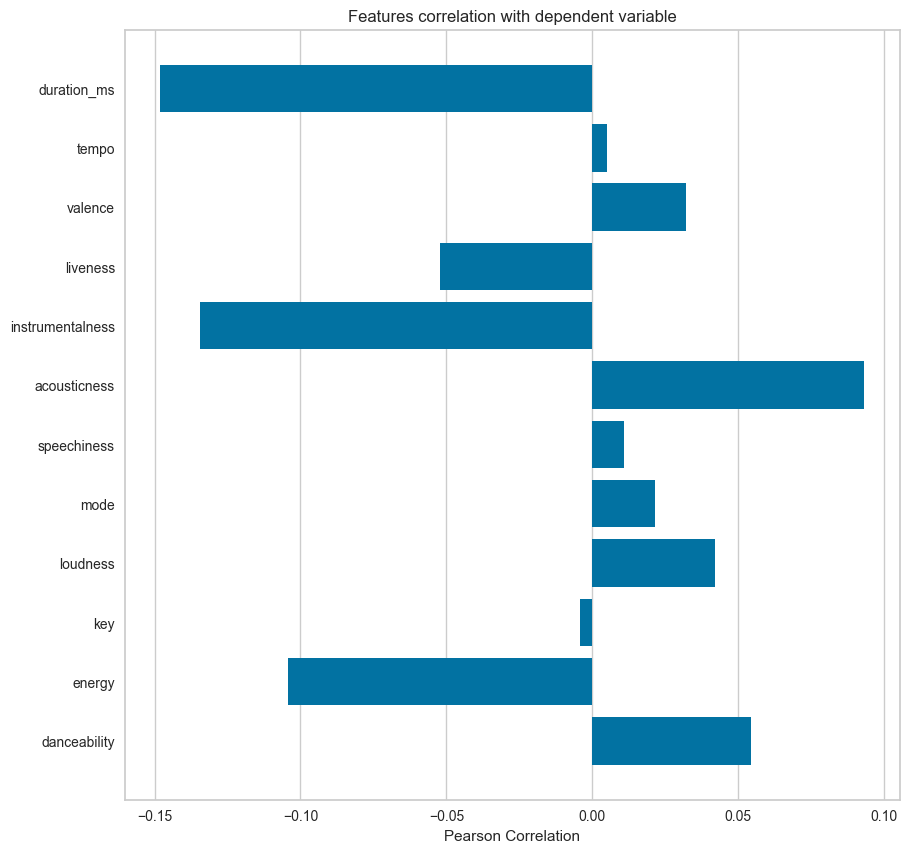

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [6]:
from yellowbrick.target import FeatureCorrelation
feature_name=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
X,Y=df[feature_name],df['track_popularity']
features=np.array(feature_name)
visualizer=FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']=(10,10)
visualizer.fit(X,Y)
visualizer.show()

In [7]:
withgenre_df=df.copy()
for index, row in df.iterrows():
    row['playlist_genre']=row['playlist_genre'].split(' ')
    row['playlist_subgenre']=row['playlist_subgenre'].split('/')
    for genre in row['playlist_genre']:
        withgenre_df.at[index,genre]=1
    for genre in row['playlist_subgenre']:
        withgenre_df.at[index,genre]=1
withgenre_df=withgenre_df.fillna(0)
withgenre_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,r&b,urban contemporary,hip pop,new jack swing,neo soul,edm,electro house,big room,pop edm,progressive electro house
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def normalisedata(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

withgenre_df['track_popularity']=normalisedata(withgenre_df['track_popularity'])
withgenre_df['duration_ms']=normalisedata(withgenre_df['duration_ms'])
withgenre_df['loudness']=normalisedata(withgenre_df['loudness'])
withgenre_df['tempo']=normalisedata(withgenre_df['tempo'])
withgenre_df['key']=normalisedata(withgenre_df['key'])
withgenre_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,r&b,urban contemporary,hip pop,new jack swing,neo soul,edm,electro house,big room,pop edm,progressive electro house
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.673469,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,0.683673,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,0.714286,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.612245,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.704082,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# if a new user signs in spotify, the smart shuffle will face the problem of recommending songs as almost no data will be available to use content based modeling and collaborative filtering
# in this case spotify is most likel to recommend songs on the basis of popularity of songs
# Popularity
popular_songs=withgenre_df[['track_name','track_artist','track_popularity','playlist_genre','playlist_subgenre']].sort_values(by='track_popularity',ascending=False)
popular_songs=popular_songs.drop('track_popularity',axis=1)
model1=popular_songs.head(20).reset_index(drop=True)
model1

,track_name,track_artist,playlist_genre,playlist_subgenre
0,Memories,Maroon 5,pop,dance pop
1,The Box,Roddy Ricch,rap,hip hop
2,Tusa,KAROL G,pop,dance pop
3,Blinding Lights,The Weeknd,pop,dance pop
4,Don't Start Now,Dua Lipa,pop,post-teen pop
5,Falling,Trevor Daniel,pop,electropop
6,everything i wanted,Billie Eilish,pop,dance pop
7,RITMO (Bad Boys For Life),The Black Eyed Peas,pop,dance pop
8,bad guy,Billie Eilish,pop,dance pop
9,Yummy,Justin Bieber,pop,dance pop


In [10]:
# let us now see how content based modeling can be helpful in recommending songs
music_reco_df1=withgenre_df.copy().drop(['playlist_id','track_popularity','track_album_name','track_album_release_date','playlist_name','duration_ms','track_album_id'],axis=1)
music_reco_df1.head()

,track_id,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,...,r&b,urban contemporary,hip pop,new jack swing,neo soul,edm,electro house,big room,pop edm,progressive electro house
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,pop,dance pop,0.748,0.916,0.545455,0.918090,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,pop,dance pop,0.726,0.815,1.000000,0.869162,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,pop,dance pop,0.675,0.931,0.090909,0.901368,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,pop,dance pop,0.718,0.930,0.636364,0.894118,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,pop,dance pop,0.650,0.833,0.090909,0.875385,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# getting users old data
userInput=[
          {'track_name':"I Don't Care (with Justin Bieber)",'date_added':'2023-08-01'},
          {'track_name':"BOP",'date_added':'2022-07-22'},
          {'track_name':"Liar",'date_added':'2023-02-11'},
          {'track_name':"Oops!... I Did It Again",'date_added':'2022-04-07'},
          {'track_name':"We Don't Talk Anymore",'date_added':'2022-03-01'}  
]
inputMusic=pd.DataFrame(userInput)
inputMusic=inputMusic.sort_values(by=['date_added'],ascending=True).reset_index(drop=True)
inputMusic

,track_name,date_added
0,We Don't Talk Anymore,2022-03-01
1,Oops!... I Did It Again,2022-04-07
2,BOP,2022-07-22
3,Liar,2023-02-11
4,I Don't Care (with Justin Bieber),2023-08-01


In [12]:
inputId=music_reco_df1[music_reco_df1['track_name'].isin(inputMusic['track_name'])]
inputId = inputId.reset_index(drop=True)
inputId

,track_id,track_name,track_artist,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,...,r&b,urban contemporary,hip pop,new jack swing,neo soul,edm,electro house,big room,pop edm,progressive electro house
0,7LzouaWGFCy4tkXDOOnEyM,Liar,Camila Cabello,pop,dance pop,0.740,0.498,1.000000,0.833225,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0hVXuCcriWRGvwMV1r5Yn9,I Don't Care (with Justin Bieber),Ed Sheeran,pop,post-teen pop,0.798,0.675,0.545455,0.867653,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,06KyNuuMOX1ROXRhj787tj,We Don't Talk Anymore,Charlie Puth,pop,electropop,0.728,0.563,0.090909,0.804539,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6Ozh9Ok6h4Oi1wUSLtBseN,BOP,DaBaby,rap,hip hop,0.769,0.787,1.000000,0.891373,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7yle4EK9gfIin6lQsAjCL9,Oops!... I Did It Again,why mona,rap,trap,0.798,0.664,0.727273,0.882740,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# using added date as weights
# need to check recent date
from datetime import datetime
date_df=inputMusic[['date_added']]
weight=list()
least_recent_date=datetime.strptime(date_df['date_added'][0],'%Y-%m-%d').date()
for date in date_df['date_added']:
    date=datetime.strptime(date,'%Y-%m-%d').date()
    n=str(date-least_recent_date).split(' ')[0]
    if n=='0:00:00':
        weight.append(0)
    else:
        weight.append(int(n))
weight=normalisedata(weight)
inputMusic['weight']=weight
inputMusic

,track_name,date_added,weight
0,We Don't Talk Anymore,2022-03-01,0.000000
1,Oops!... I Did It Again,2022-04-07,0.071429
2,BOP,2022-07-22,0.276062
3,Liar,2023-02-11,0.669884
4,I Don't Care (with Justin Bieber),2023-08-01,1.000000


In [14]:
userMatrix=inputId.drop(['track_id','track_name','track_artist','playlist_genre','playlist_subgenre'],axis=1)
userMatrix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,r&b,urban contemporary,hip pop,new jack swing,neo soul,edm,electro house,big room,pop edm,progressive electro house
0,0.740,0.498,1.000000,0.833225,0,0.0456,0.0169,0.002820,0.3190,0.652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.798,0.675,0.545455,0.867653,1,0.0442,0.0912,0.000000,0.0894,0.842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.728,0.563,0.090909,0.804539,0,0.1340,0.6210,0.000000,0.1790,0.352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.769,0.787,1.000000,0.891373,1,0.3670,0.1890,0.000000,0.1290,0.836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.798,0.664,0.727273,0.882740,0,0.0300,0.4600,0.000007,0.1570,0.314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
userProfile=userMatrix.transpose().dot(inputMusic['weight'])
userProfile

danceability                 1.571114
energy                       1.394836
key                          1.461214
loudness                     1.763934
mode                         0.741313
speechiness                  0.315997
acousticness                 0.764557
instrumentalness             0.000007
liveness                     0.299216
valence                      1.031340
tempo                        0.959905
pop                          0.347490
dance pop                    0.000000
post-teen pop                0.071429
electropop                   0.276062
indie poptimism              0.000000
rap                          1.669884
hip hop                      0.669884
southern hip hop             0.000000
gangster rap                 0.000000
trap                         1.000000
rock                         0.000000
album rock                   0.000000
classic rock                 0.000000
permanent wave               0.000000
hard rock                    0.000000
latin       

In [16]:
comparematrix=music_reco_df1.set_index(music_reco_df1['track_id'])
comparematrix=comparematrix.drop(['track_id','track_name','track_artist','playlist_genre','playlist_subgenre'],axis=1)
comparematrix.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,r&b,urban contemporary,hip pop,new jack swing,neo soul,edm,electro house,big room,pop edm,progressive electro house
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.748,0.916,0.545455,0.918090,1,0.0583,0.1020,0.000000,0.0653,0.518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0r7CVbZTWZgbTCYdfa2P31,0.726,0.815,1.000000,0.869162,1,0.0373,0.0724,0.004210,0.3570,0.693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1z1Hg7Vb0AhHDiEmnDE79l,0.675,0.931,0.090909,0.901368,0,0.0742,0.0794,0.000023,0.1100,0.613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75FpbthrwQmzHlBJLuGdC7,0.718,0.930,0.636364,0.894118,1,0.1020,0.0287,0.000009,0.2040,0.277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1e8PAfcKUYoKkxPhrHqw4x,0.650,0.833,0.090909,0.875385,1,0.0359,0.0803,0.000000,0.0833,0.725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
recommendationtable_df=((comparematrix*userProfile).sum(axis=1))/(userProfile.sum())
recommendationtable_df = recommendationtable_df.sort_values(ascending=False)
recommendationtable_df.head()

track_id
1JGb28R23RdtKZYT4XOf7u    0.742048
1j44jBqva5YwRKsbYF3tPA    0.736915
6YnvT0ToBvUTWjhFwvIgeF    0.729025
3OUPJPD1OmFd8gL7ztY9v8    0.727629
6K7V47wFpfam2aeE893rbL    0.722325
dtype: float64

In [18]:
model2=df.loc[df['track_id'].isin(recommendationtable_df.head(20).keys())][['track_name','track_artist','playlist_genre','playlist_subgenre']].reset_index(drop=True)
model2

,track_name,track_artist,playlist_genre,playlist_subgenre
0,Ziom z papieru,BORCREW,rap,hip hop
1,Tell Em I'm Doing Eetswa,Hooligan Hefs,rap,hip hop
2,REPEAT (feat. Pistol Pete & Enzo),Jaecy,rap,hip hop
3,100 Miles and Running (ft. Wale & John Lindahl),Logic,rap,hip hop
4,The King,Amrit Maan,rap,hip hop
5,La Vida Me Hizo Cabron,C-Kan,rap,hip hop
6,Com a Mala,Costa Gold,rap,trap
7,Malvadão 2,Xamã,rap,trap
8,Suave - Remix,Jey Blessing,rap,trap
9,Otro Round,Brytiago,rap,trap


In [19]:
# collaborative model

year=list()
for date in withgenre_df['track_album_release_date']:
    x=date.split('-')
    year.append(int(x[0]))
withgenre_df['year']=year


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

music_reco_df2=withgenre_df.copy().drop(['track_id','track_name','track_artist','track_album_release_date','track_album_id','track_album_name','playlist_name','playlist_id','playlist_genre','playlist_subgenre'],axis=1)
similarity=cosine_similarity(music_reco_df2)

In [21]:
def recommendation(song):
    idx=df.loc[df['track_name']==song].index[0]
    distances=sorted(list(enumerate(similarity[idx])),reverse=False,key=lambda x:x[1])
    songs=[]
    for i in distances[1:21]:
        songs.append(df.iloc[i[0]].track_name)
    return songs

In [22]:
import random
def recommended_songs(song):
    model3 = df.loc[df['track_name'].isin(recommendation(song))][['track_name','track_artist','playlist_genre','playlist_subgenre']].reset_index(drop=True)
    recommended_songs_list=pd.concat([model1, model2, model3])
    return recommended_songs_list.sample(n=20).reset_index(drop=True)

In [23]:
import gradio as gr
iface=gr.Interface(
    fn=recommended_songs,
    inputs=gr.Textbox(label="Enter song"),
    outputs="dataframe",
    title="TuneAI"
)
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
